In [1]:
from data_generator import BaseDataset
from dataset import DatasetGenerator
import matplotlib.pyplot as plt
import os
from eval_model import eval_pearsonsr, scale_preds
from keras.src.optimizers import Adam
from model import ModelTrainer
from sklearn.model_selection import KFold


os.environ["CUDA_VISIBLE_DEVICES"] = "1"


2024-05-21 01:22:49.431338: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 01:22:49.431420: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 01:22:49.431464: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 01:22:49.442798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_path = 'data'
dataset_path = 'dataset'
train_scalers_path = 'train-scalers'
columns = ['date', 'RSAM', 'T_olb', 'Ru_olb', 'P_olb', 'Rn_olb', 'T_msa',
           'Ru_msa', 'P_msa', 'Rn_msa', 'displacement (cm)',
           'background seismicity']
"""
    In questo punto carico i dati con i generator e li trasformo in X,y
"""
# dataset
dataset = BaseDataset(data_path=dataset_path)

In [3]:
# carico i dati, li divido e creo i generators
train_filenames, test_filenames = dataset.load_data(shuffle=False)
# li carico già divisi, non serve più splittarli
train_generator, test_generator, _, __ = dataset.generate_data(train_filenames, test_filenames)
# ottengo X_train,y_train ed X_test, y_test
X_train, y_train = dataset.generator_to_Xy(train_generator)
X_test, y_test = dataset.generator_to_Xy(test_generator)

In [5]:
rn = DatasetGenerator.get_ts_from_ds(X_train, 0)
rn_test = DatasetGenerator.get_ts_from_ds(X_test, 0)

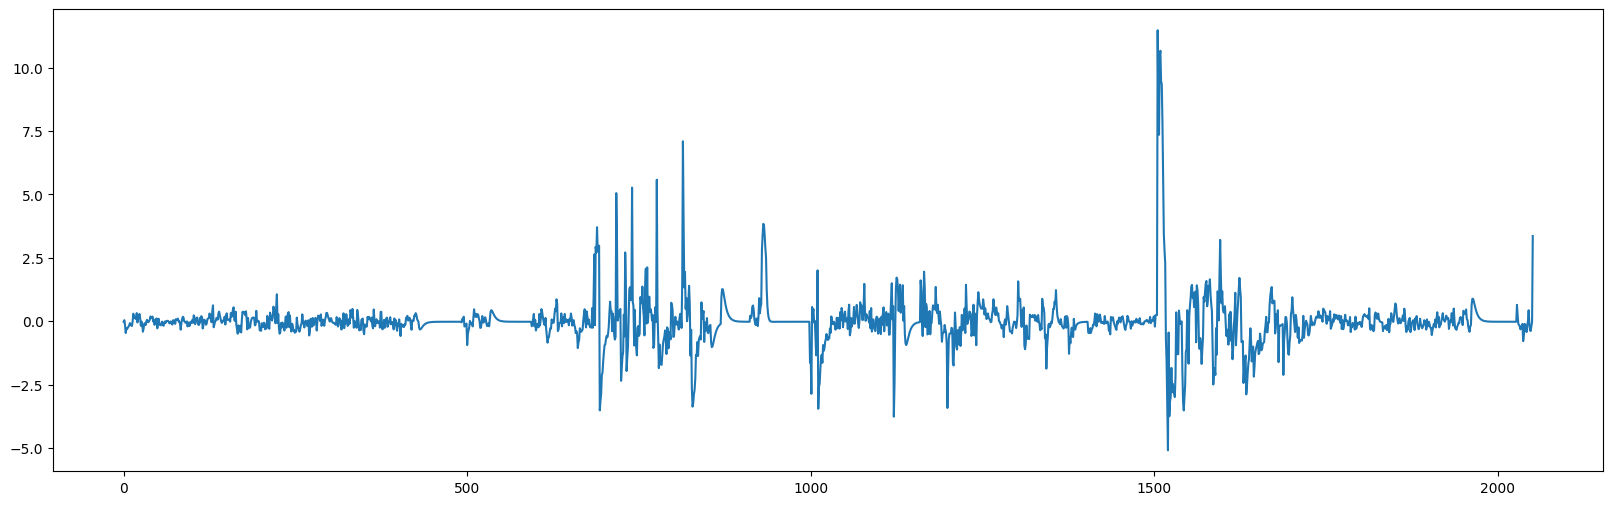

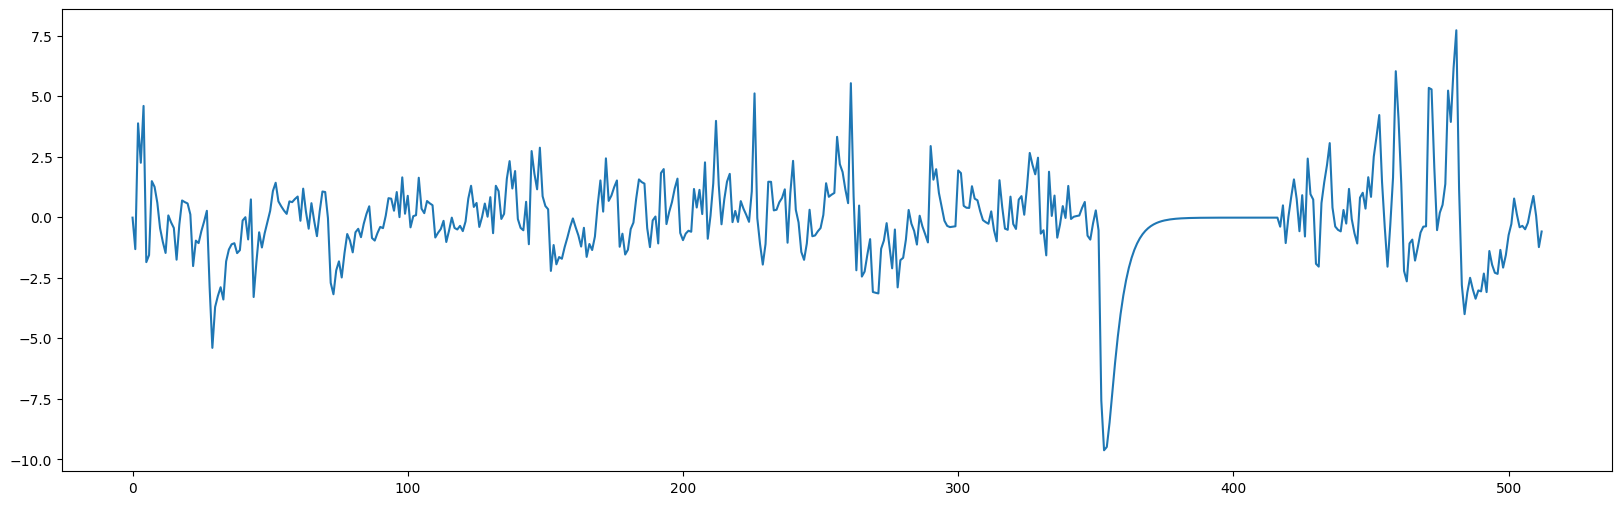

In [6]:
plt.figure(figsize=(20,6))
plt.plot(rn)
plt.figure(figsize=(20,6))
plt.plot(rn_test)

In [3]:
import string
import hashlib
import random
def generate_model_name():
    # Convert hyperparameters to a string
    letters = string.ascii_lowercase  # Use lowercase letters
    hyperparameters = ''.join(random.choice(letters) for i in range(20))

    hyperparameters_str = str(hyperparameters) + str(random.randint(1,1000))
    # Generate SHA-256 hash
    hash_object = hashlib.sha256(hyperparameters_str.encode())
    model_name = hash_object.hexdigest()[:8]  # Take first 8 characters for readability

    return model_name

(2023, 2)


2024-05-21 01:23:02.020735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15389 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:6d:00.0, compute capability: 6.0


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18241 (71.25 KB)
Trainable params: 18241 (71.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/512


2024-05-21 01:23:05.408940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


48/50 [===========================>..] - ETA: 0s - loss: 1.1014 - mse: 1.1014
Epoch 1: val_loss improved from inf to 0.57426, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 7s 60ms/step - loss: 1.1575 - mse: 1.1575 - val_loss: 0.5743 - val_mse: 0.5743 - lr: 1.0000e-04
Epoch 2/512
49/50 [============================>.] - ETA: 0s - loss: 1.1419 - mse: 1.1419
Epoch 2: val_loss improved from 0.57426 to 0.55951, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 54ms/step - loss: 1.1305 - mse: 1.1305 - val_loss: 0.5595 - val_mse: 0.5595 - lr: 1.0000e-04
Epoch 3/512
50/50 [==============================] - ETA: 0s - loss: 1.1135 - mse: 1.1135
Epoch 3: val_loss improved from 0.55951 to 0.54909, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 1.1135 - mse: 1.1135 - val_loss: 0.5491 - val_mse: 0.5491 - lr: 1.0000e-04
Epoch 4/512
50/50 [==============================] - ETA: 0s - loss: 1.0818 - mse: 1.0818
Epoch 4: val_loss improved from 0.54909 to 0.54007, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 1.0818 - mse: 1.0818 - val_loss: 0.5401 - val_mse: 0.5401 - lr: 1.0000e-04
Epoch 5/512
49/50 [============================>.] - ETA: 0s - loss: 1.0803 - mse: 1.0803
Epoch 5: val_loss improved from 0.54007 to 0.53243, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 1.0802 - mse: 1.0802 - val_loss: 0.5324 - val_mse: 0.5324 - lr: 1.0000e-04
Epoch 6/512
50/50 [==============================] - ETA: 0s - loss: 1.0422 - mse: 1.0422
Epoch 6: val_loss improved from 0.53243 to 0.52508, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 48ms/step - loss: 1.0422 - mse: 1.0422 - val_loss: 0.5251 - val_mse: 0.5251 - lr: 1.0000e-04
Epoch 7/512
50/50 [==============================] - ETA: 0s - loss: 1.0419 - mse: 1.0419
Epoch 7: val_loss improved from 0.52508 to 0.51885, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 1.0419 - mse: 1.0419 - val_loss: 0.5188 - val_mse: 0.5188 - lr: 1.0000e-04
Epoch 8/512
50/50 [==============================] - ETA: 0s - loss: 1.0276 - mse: 1.0276
Epoch 8: val_loss improved from 0.51885 to 0.51477, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 1.0276 - mse: 1.0276 - val_loss: 0.5148 - val_mse: 0.5148 - lr: 1.0000e-04
Epoch 9/512
48/50 [===========================>..] - ETA: 0s - loss: 1.0142 - mse: 1.0142
Epoch 9: val_loss improved from 0.51477 to 0.51229, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 1.0056 - mse: 1.0056 - val_loss: 0.5123 - val_mse: 0.5123 - lr: 1.0000e-04
Epoch 10/512
50/50 [==============================] - ETA: 0s - loss: 1.0011 - mse: 1.0011
Epoch 10: val_loss improved from 0.51229 to 0.50733, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 0.5073 - val_mse: 0.5073 - lr: 1.0000e-04
Epoch 11/512
49/50 [============================>.] - ETA: 0s - loss: 0.9724 - mse: 0.9724
Epoch 11: val_loss improved from 0.50733 to 0.50342, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.9892 - mse: 0.9892 - val_loss: 0.5034 - val_mse: 0.5034 - lr: 1.0000e-04
Epoch 12/512
47/50 [===========================>..] - ETA: 0s - loss: 1.0063 - mse: 1.0063
Epoch 12: val_loss improved from 0.50342 to 0.50106, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.9826 - mse: 0.9826 - val_loss: 0.5011 - val_mse: 0.5011 - lr: 1.0000e-04
Epoch 13/512
50/50 [==============================] - ETA: 0s - loss: 0.9657 - mse: 0.9657
Epoch 13: val_loss improved from 0.50106 to 0.49716, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.9657 - mse: 0.9657 - val_loss: 0.4972 - val_mse: 0.4972 - lr: 1.0000e-04
Epoch 14/512
50/50 [==============================] - ETA: 0s - loss: 0.9587 - mse: 0.9587
Epoch 14: val_loss improved from 0.49716 to 0.49408, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.9587 - mse: 0.9587 - val_loss: 0.4941 - val_mse: 0.4941 - lr: 1.0000e-04
Epoch 15/512
48/50 [===========================>..] - ETA: 0s - loss: 0.9379 - mse: 0.9379
Epoch 15: val_loss improved from 0.49408 to 0.49023, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 56ms/step - loss: 0.9591 - mse: 0.9591 - val_loss: 0.4902 - val_mse: 0.4902 - lr: 1.0000e-04
Epoch 16/512
50/50 [==============================] - ETA: 0s - loss: 0.9385 - mse: 0.9385
Epoch 16: val_loss improved from 0.49023 to 0.48800, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.9385 - mse: 0.9385 - val_loss: 0.4880 - val_mse: 0.4880 - lr: 1.0000e-04
Epoch 17/512
50/50 [==============================] - ETA: 0s - loss: 0.9265 - mse: 0.9265
Epoch 17: val_loss improved from 0.48800 to 0.48529, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.9265 - mse: 0.9265 - val_loss: 0.4853 - val_mse: 0.4853 - lr: 1.0000e-04
Epoch 18/512
47/50 [===========================>..] - ETA: 0s - loss: 0.8998 - mse: 0.8998
Epoch 18: val_loss improved from 0.48529 to 0.48131, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 66ms/step - loss: 0.9018 - mse: 0.9018 - val_loss: 0.4813 - val_mse: 0.4813 - lr: 1.0000e-04
Epoch 19/512
50/50 [==============================] - ETA: 0s - loss: 0.9179 - mse: 0.9179
Epoch 19: val_loss improved from 0.48131 to 0.47544, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.9179 - mse: 0.9179 - val_loss: 0.4754 - val_mse: 0.4754 - lr: 1.0000e-04
Epoch 20/512
50/50 [==============================] - ETA: 0s - loss: 0.9084 - mse: 0.9084
Epoch 20: val_loss did not improve from 0.47544
50/50 [==============================] - 1s 11ms/step - loss: 0.9084 - mse: 0.9084 - val_loss: 0.4755 - val_mse: 0.4755 - lr: 1.0000e-04
Epoch 21/512
47/50 [===========================>..] - ETA: 0s - loss: 0.9110 - mse: 0.9110
Epoch 21: val_loss improved from 0.47544 to 0.47157, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.9027 - mse: 0.9027 - val_loss: 0.4716 - val_mse: 0.4716 - lr: 1.0000e-04
Epoch 22/512
47/50 [===========================>..] - ETA: 0s - loss: 0.8950 - mse: 0.8950
Epoch 22: val_loss improved from 0.47157 to 0.46629, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 50ms/step - loss: 0.8829 - mse: 0.8829 - val_loss: 0.4663 - val_mse: 0.4663 - lr: 1.0000e-04
Epoch 23/512
48/50 [===========================>..] - ETA: 0s - loss: 0.9015 - mse: 0.9015
Epoch 23: val_loss improved from 0.46629 to 0.46261, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 52ms/step - loss: 0.8921 - mse: 0.8921 - val_loss: 0.4626 - val_mse: 0.4626 - lr: 1.0000e-04
Epoch 24/512
49/50 [============================>.] - ETA: 0s - loss: 0.8734 - mse: 0.8734
Epoch 24: val_loss improved from 0.46261 to 0.45918, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.8753 - mse: 0.8753 - val_loss: 0.4592 - val_mse: 0.4592 - lr: 1.0000e-04
Epoch 25/512
49/50 [============================>.] - ETA: 0s - loss: 0.8547 - mse: 0.8547
Epoch 25: val_loss improved from 0.45918 to 0.45796, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.8492 - mse: 0.8492 - val_loss: 0.4580 - val_mse: 0.4580 - lr: 1.0000e-04
Epoch 26/512
49/50 [============================>.] - ETA: 0s - loss: 0.8205 - mse: 0.8205
Epoch 26: val_loss improved from 0.45796 to 0.45147, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 56ms/step - loss: 0.8499 - mse: 0.8499 - val_loss: 0.4515 - val_mse: 0.4515 - lr: 1.0000e-04
Epoch 27/512
48/50 [===========================>..] - ETA: 0s - loss: 0.8504 - mse: 0.8504
Epoch 27: val_loss improved from 0.45147 to 0.44990, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.8473 - mse: 0.8473 - val_loss: 0.4499 - val_mse: 0.4499 - lr: 1.0000e-04
Epoch 28/512
49/50 [============================>.] - ETA: 0s - loss: 0.8236 - mse: 0.8236
Epoch 28: val_loss improved from 0.44990 to 0.44327, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.8431 - mse: 0.8431 - val_loss: 0.4433 - val_mse: 0.4433 - lr: 1.0000e-04
Epoch 29/512
45/50 [==========================>...] - ETA: 0s - loss: 0.8029 - mse: 0.8029
Epoch 29: val_loss improved from 0.44327 to 0.44025, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 60ms/step - loss: 0.8163 - mse: 0.8163 - val_loss: 0.4403 - val_mse: 0.4403 - lr: 1.0000e-04
Epoch 30/512
50/50 [==============================] - ETA: 0s - loss: 0.8380 - mse: 0.8380
Epoch 30: val_loss improved from 0.44025 to 0.43747, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 52ms/step - loss: 0.8380 - mse: 0.8380 - val_loss: 0.4375 - val_mse: 0.4375 - lr: 1.0000e-04
Epoch 31/512
44/50 [=========================>....] - ETA: 0s - loss: 0.8002 - mse: 0.8002
Epoch 31: val_loss improved from 0.43747 to 0.43434, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.8140 - mse: 0.8140 - val_loss: 0.4343 - val_mse: 0.4343 - lr: 1.0000e-04
Epoch 32/512
49/50 [============================>.] - ETA: 0s - loss: 0.8193 - mse: 0.8193
Epoch 32: val_loss improved from 0.43434 to 0.43266, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 59ms/step - loss: 0.8116 - mse: 0.8116 - val_loss: 0.4327 - val_mse: 0.4327 - lr: 1.0000e-04
Epoch 33/512
50/50 [==============================] - ETA: 0s - loss: 0.8130 - mse: 0.8130
Epoch 33: val_loss did not improve from 0.43266
50/50 [==============================] - 1s 11ms/step - loss: 0.8130 - mse: 0.8130 - val_loss: 0.4353 - val_mse: 0.4353 - lr: 1.0000e-04
Epoch 34/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7912 - mse: 0.7912
Epoch 34: val_loss improved from 0.43266 to 0.42743, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.8015 - mse: 0.8015 - val_loss: 0.4274 - val_mse: 0.4274 - lr: 1.0000e-04
Epoch 35/512
50/50 [==============================] - ETA: 0s - loss: 0.7986 - mse: 0.7986
Epoch 35: val_loss did not improve from 0.42743
50/50 [==============================] - 1s 11ms/step - loss: 0.7986 - mse: 0.7986 - val_loss: 0.4297 - val_mse: 0.4297 - lr: 1.0000e-04
Epoch 36/512
47/50 [===========================>..] - ETA: 0s - loss: 0.7849 - mse: 0.7849
Epoch 36: val_loss improved from 0.42743 to 0.42426, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.8076 - mse: 0.8076 - val_loss: 0.4243 - val_mse: 0.4243 - lr: 1.0000e-04
Epoch 37/512
50/50 [==============================] - ETA: 0s - loss: 0.7978 - mse: 0.7978
Epoch 37: val_loss improved from 0.42426 to 0.42026, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7978 - mse: 0.7978 - val_loss: 0.4203 - val_mse: 0.4203 - lr: 1.0000e-04
Epoch 38/512
46/50 [==========================>...] - ETA: 0s - loss: 0.7719 - mse: 0.7719
Epoch 38: val_loss did not improve from 0.42026
50/50 [==============================] - 1s 12ms/step - loss: 0.7741 - mse: 0.7741 - val_loss: 0.4237 - val_mse: 0.4237 - lr: 1.0000e-04
Epoch 39/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7816 - mse: 0.7816
Epoch 39: val_loss did not improve from 0.42026
50/50 [==============================] - 1s 11ms/step - loss: 0.7753 - mse: 0.7753 - val_loss: 0.4230 - val_mse: 0.4230 - lr: 1.0000e-04
Epoch 40/512
50/50 [==============================] - ETA: 0s - loss: 0.7939 - mse: 0.7939
Epoch 40: val_loss did not improve from 0.42026
50/50 [==============================] - 1s 11ms/step - loss: 0.7939 - mse: 0.7939 - val_loss: 0.4221 - val_mse: 0.4221 - lr: 1.0000e-04
Epoch 41/512
50/50 [===============

INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.7778 - mse: 0.7778 - val_loss: 0.4201 - val_mse: 0.4201 - lr: 1.0000e-04
Epoch 42/512
49/50 [============================>.] - ETA: 0s - loss: 0.7802 - mse: 0.7802
Epoch 42: val_loss improved from 0.42015 to 0.41856, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 59ms/step - loss: 0.7786 - mse: 0.7786 - val_loss: 0.4186 - val_mse: 0.4186 - lr: 1.0000e-04
Epoch 43/512
50/50 [==============================] - ETA: 0s - loss: 0.7670 - mse: 0.7670
Epoch 43: val_loss improved from 0.41856 to 0.41706, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.7670 - mse: 0.7670 - val_loss: 0.4171 - val_mse: 0.4171 - lr: 1.0000e-04
Epoch 44/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7762 - mse: 0.7762
Epoch 44: val_loss improved from 0.41706 to 0.41538, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7770 - mse: 0.7770 - val_loss: 0.4154 - val_mse: 0.4154 - lr: 1.0000e-04
Epoch 45/512
47/50 [===========================>..] - ETA: 0s - loss: 0.8072 - mse: 0.8072
Epoch 45: val_loss did not improve from 0.41538
50/50 [==============================] - 1s 12ms/step - loss: 0.7759 - mse: 0.7759 - val_loss: 0.4169 - val_mse: 0.4169 - lr: 1.0000e-04
Epoch 46/512
49/50 [============================>.] - ETA: 0s - loss: 0.7586 - mse: 0.7586
Epoch 46: val_loss did not improve from 0.41538
50/50 [==============================] - 1s 11ms/step - loss: 0.7541 - mse: 0.7541 - val_loss: 0.4175 - val_mse: 0.4175 - lr: 1.0000e-04
Epoch 47/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7694 - mse: 0.7694
Epoch 47: val_loss did not improve from 0.41538
50/50 [==============================] - 1s 12ms/step - loss: 0.7740 - mse: 0.7740 - val_loss: 0.4167 - val_mse: 0.4167 - lr: 1.0000e-04
Epoch 48/512
49/50 [===============

INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 59ms/step - loss: 0.7523 - mse: 0.7523 - val_loss: 0.4150 - val_mse: 0.4150 - lr: 1.0000e-04
Epoch 50/512
50/50 [==============================] - ETA: 0s - loss: 0.7717 - mse: 0.7717
Epoch 50: val_loss did not improve from 0.41496
50/50 [==============================] - 1s 11ms/step - loss: 0.7717 - mse: 0.7717 - val_loss: 0.4185 - val_mse: 0.4185 - lr: 1.0000e-04
Epoch 51/512
50/50 [==============================] - ETA: 0s - loss: 0.7649 - mse: 0.7649
Epoch 51: val_loss did not improve from 0.41496
50/50 [==============================] - 1s 11ms/step - loss: 0.7649 - mse: 0.7649 - val_loss: 0.4202 - val_mse: 0.4202 - lr: 1.0000e-04
Epoch 52/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7665 - mse: 0.7665
Epoch 52: val_loss improved from 0.41496 to 0.41296, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7430 - mse: 0.7430 - val_loss: 0.4130 - val_mse: 0.4130 - lr: 1.0000e-04
Epoch 53/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7427 - mse: 0.7427
Epoch 53: val_loss did not improve from 0.41296
50/50 [==============================] - 1s 11ms/step - loss: 0.7608 - mse: 0.7608 - val_loss: 0.4211 - val_mse: 0.4211 - lr: 1.0000e-04
Epoch 54/512
43/50 [========================>.....] - ETA: 0s - loss: 0.7053 - mse: 0.7053
Epoch 54: val_loss did not improve from 0.41296
50/50 [==============================] - 1s 11ms/step - loss: 0.7535 - mse: 0.7535 - val_loss: 0.4176 - val_mse: 0.4176 - lr: 1.0000e-04
Epoch 55/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7297 - mse: 0.7297
Epoch 55: val_loss improved from 0.41296 to 0.41196, saving model to saved_model/bcf9f829.x
INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


INFO:tensorflow:Assets written to: saved_model/bcf9f829.x/assets


50/50 [==============================] - 3s 55ms/step - loss: 0.7596 - mse: 0.7596 - val_loss: 0.4120 - val_mse: 0.4120 - lr: 1.0000e-04
Epoch 56/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7078 - mse: 0.7078
Epoch 56: val_loss did not improve from 0.41196
50/50 [==============================] - 1s 11ms/step - loss: 0.7501 - mse: 0.7501 - val_loss: 0.4142 - val_mse: 0.4142 - lr: 1.0000e-04
Epoch 57/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7421 - mse: 0.7421
Epoch 57: val_loss did not improve from 0.41196
50/50 [==============================] - 1s 11ms/step - loss: 0.7357 - mse: 0.7357 - val_loss: 0.4125 - val_mse: 0.4125 - lr: 1.0000e-04
Epoch 58/512
50/50 [==============================] - ETA: 0s - loss: 0.7505 - mse: 0.7505
Epoch 58: val_loss did not improve from 0.41196
50/50 [==============================] - 1s 11ms/step - loss: 0.7505 - mse: 0.7505 - val_loss: 0.4172 - val_mse: 0.4172 - lr: 1.0000e-04
Epoch 59/512
50/50 [===============

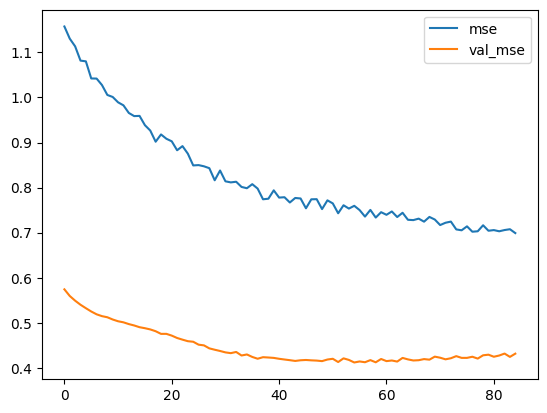

accuracy test: 
13/13 [==============================] - 0s 7ms/step - loss: 0.8225 - mse: 0.8225
Pearsons correlation: 0.448
Pearsons correlation on scaled vals: 0.429


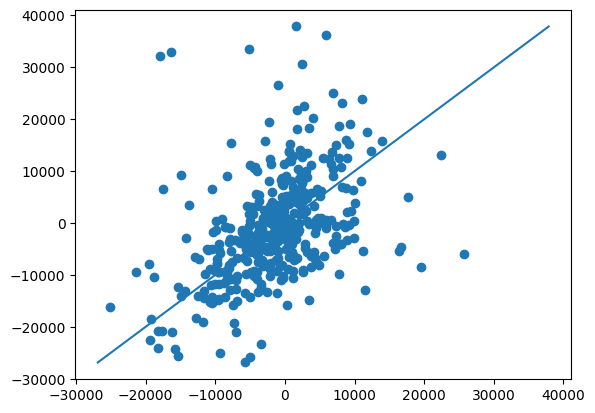

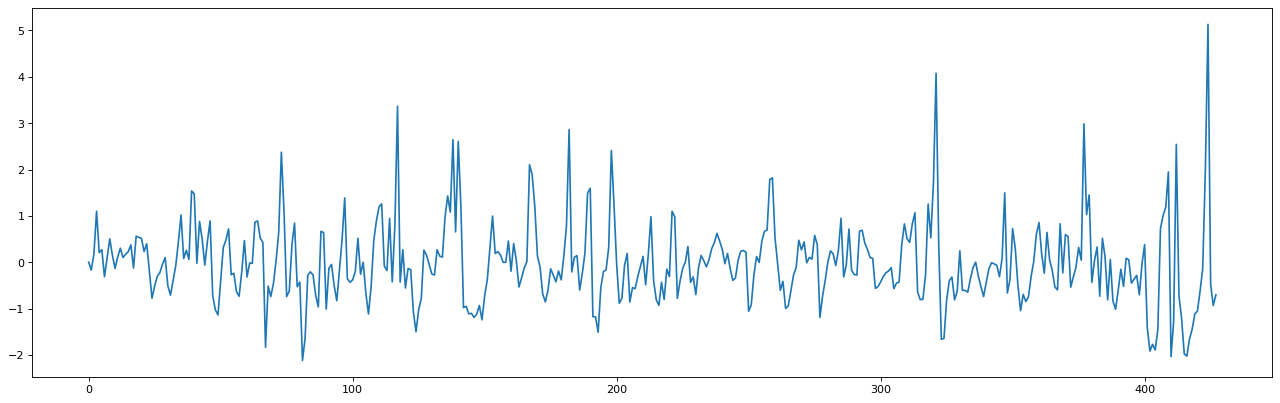

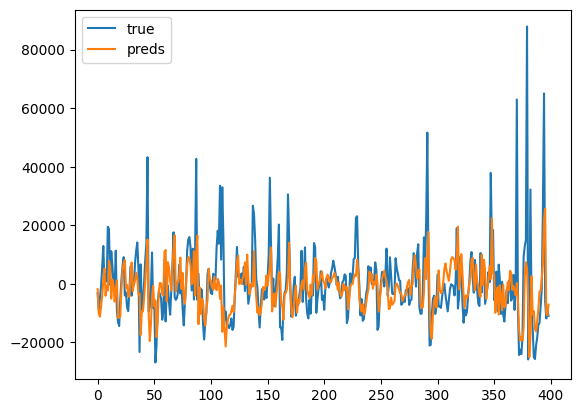

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 6)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18241 (71.25 KB)
Trainable params: 18241 (71.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/512
50/50 [==============================] - ETA: 0s - loss: 0.8365 - mse: 0.8365
Epoch 1: val_loss improved from inf to 1.97162, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 4s 56ms/step - loss: 0.8365 - mse: 0.8365 - val_loss: 1.9716 - val_mse: 1.9716 - lr: 1.0000e-04
Epoch 2/512
44/50 [=========================>....] - ETA: 0s - loss: 0.8347 - mse: 0.8347
Epoch 2: val_loss improved from 1.97162 to 1.94346, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.8006 - mse: 0.8006 - val_loss: 1.9435 - val_mse: 1.9435 - lr: 1.0000e-04
Epoch 3/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7353 - mse: 0.7353
Epoch 3: val_loss improved from 1.94346 to 1.91976, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7732 - mse: 0.7732 - val_loss: 1.9198 - val_mse: 1.9198 - lr: 1.0000e-04
Epoch 4/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7689 - mse: 0.7689
Epoch 4: val_loss improved from 1.91976 to 1.89592, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.7709 - mse: 0.7709 - val_loss: 1.8959 - val_mse: 1.8959 - lr: 1.0000e-04
Epoch 5/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7583 - mse: 0.7583
Epoch 5: val_loss improved from 1.89592 to 1.87510, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.7529 - mse: 0.7529 - val_loss: 1.8751 - val_mse: 1.8751 - lr: 1.0000e-04
Epoch 6/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7269 - mse: 0.7269
Epoch 6: val_loss improved from 1.87510 to 1.85638, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.7307 - mse: 0.7307 - val_loss: 1.8564 - val_mse: 1.8564 - lr: 1.0000e-04
Epoch 7/512
50/50 [==============================] - ETA: 0s - loss: 0.7101 - mse: 0.7101
Epoch 7: val_loss improved from 1.85638 to 1.83895, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.7101 - mse: 0.7101 - val_loss: 1.8390 - val_mse: 1.8390 - lr: 1.0000e-04
Epoch 8/512
50/50 [==============================] - ETA: 0s - loss: 0.6953 - mse: 0.6953
Epoch 8: val_loss improved from 1.83895 to 1.82145, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.6953 - mse: 0.6953 - val_loss: 1.8215 - val_mse: 1.8215 - lr: 1.0000e-04
Epoch 9/512
49/50 [============================>.] - ETA: 0s - loss: 0.6918 - mse: 0.6918
Epoch 9: val_loss improved from 1.82145 to 1.80593, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.7056 - mse: 0.7056 - val_loss: 1.8059 - val_mse: 1.8059 - lr: 1.0000e-04
Epoch 10/512
45/50 [==========================>...] - ETA: 0s - loss: 0.6776 - mse: 0.6776
Epoch 10: val_loss improved from 1.80593 to 1.79274, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.6930 - mse: 0.6930 - val_loss: 1.7927 - val_mse: 1.7927 - lr: 1.0000e-04
Epoch 11/512
49/50 [============================>.] - ETA: 0s - loss: 0.6654 - mse: 0.6654
Epoch 11: val_loss improved from 1.79274 to 1.77785, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.6792 - mse: 0.6792 - val_loss: 1.7778 - val_mse: 1.7778 - lr: 1.0000e-04
Epoch 12/512
50/50 [==============================] - ETA: 0s - loss: 0.6553 - mse: 0.6553
Epoch 12: val_loss improved from 1.77785 to 1.76503, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.6553 - mse: 0.6553 - val_loss: 1.7650 - val_mse: 1.7650 - lr: 1.0000e-04
Epoch 13/512
45/50 [==========================>...] - ETA: 0s - loss: 0.6669 - mse: 0.6669
Epoch 13: val_loss improved from 1.76503 to 1.75278, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.6619 - mse: 0.6619 - val_loss: 1.7528 - val_mse: 1.7528 - lr: 1.0000e-04
Epoch 14/512
48/50 [===========================>..] - ETA: 0s - loss: 0.6653 - mse: 0.6653
Epoch 14: val_loss improved from 1.75278 to 1.73990, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.6544 - mse: 0.6544 - val_loss: 1.7399 - val_mse: 1.7399 - lr: 1.0000e-04
Epoch 15/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5978 - mse: 0.5978
Epoch 15: val_loss improved from 1.73990 to 1.72801, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 55ms/step - loss: 0.6232 - mse: 0.6232 - val_loss: 1.7280 - val_mse: 1.7280 - lr: 1.0000e-04
Epoch 16/512
45/50 [==========================>...] - ETA: 0s - loss: 0.6669 - mse: 0.6669
Epoch 16: val_loss improved from 1.72801 to 1.71494, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.6373 - mse: 0.6373 - val_loss: 1.7149 - val_mse: 1.7149 - lr: 1.0000e-04
Epoch 17/512
45/50 [==========================>...] - ETA: 0s - loss: 0.6308 - mse: 0.6308
Epoch 17: val_loss improved from 1.71494 to 1.70142, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.6274 - mse: 0.6274 - val_loss: 1.7014 - val_mse: 1.7014 - lr: 1.0000e-04
Epoch 18/512
47/50 [===========================>..] - ETA: 0s - loss: 0.6175 - mse: 0.6175
Epoch 18: val_loss improved from 1.70142 to 1.68729, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.6218 - mse: 0.6218 - val_loss: 1.6873 - val_mse: 1.6873 - lr: 1.0000e-04
Epoch 19/512
45/50 [==========================>...] - ETA: 0s - loss: 0.6208 - mse: 0.6208
Epoch 19: val_loss improved from 1.68729 to 1.67402, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 1.6740 - val_mse: 1.6740 - lr: 1.0000e-04
Epoch 20/512
47/50 [===========================>..] - ETA: 0s - loss: 0.5972 - mse: 0.5972
Epoch 20: val_loss improved from 1.67402 to 1.65875, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.5990 - mse: 0.5990 - val_loss: 1.6587 - val_mse: 1.6587 - lr: 1.0000e-04
Epoch 21/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5957 - mse: 0.5957
Epoch 21: val_loss improved from 1.65875 to 1.64614, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.5957 - mse: 0.5957 - val_loss: 1.6461 - val_mse: 1.6461 - lr: 1.0000e-04
Epoch 22/512
50/50 [==============================] - ETA: 0s - loss: 0.5840 - mse: 0.5840
Epoch 22: val_loss improved from 1.64614 to 1.63069, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 1.6307 - val_mse: 1.6307 - lr: 1.0000e-04
Epoch 23/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5726 - mse: 0.5726
Epoch 23: val_loss improved from 1.63069 to 1.62012, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 1.6201 - val_mse: 1.6201 - lr: 1.0000e-04
Epoch 24/512
45/50 [==========================>...] - ETA: 0s - loss: 0.5849 - mse: 0.5849
Epoch 24: val_loss improved from 1.62012 to 1.61185, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.5636 - mse: 0.5636 - val_loss: 1.6118 - val_mse: 1.6118 - lr: 1.0000e-04
Epoch 25/512
50/50 [==============================] - ETA: 0s - loss: 0.5598 - mse: 0.5598
Epoch 25: val_loss improved from 1.61185 to 1.60409, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.5598 - mse: 0.5598 - val_loss: 1.6041 - val_mse: 1.6041 - lr: 1.0000e-04
Epoch 26/512
50/50 [==============================] - ETA: 0s - loss: 0.5583 - mse: 0.5583
Epoch 26: val_loss improved from 1.60409 to 1.59888, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 56ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 1.5989 - val_mse: 1.5989 - lr: 1.0000e-04
Epoch 27/512
49/50 [============================>.] - ETA: 0s - loss: 0.5397 - mse: 0.5397
Epoch 27: val_loss improved from 1.59888 to 1.59512, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.5474 - mse: 0.5474 - val_loss: 1.5951 - val_mse: 1.5951 - lr: 1.0000e-04
Epoch 28/512
50/50 [==============================] - ETA: 0s - loss: 0.5455 - mse: 0.5455
Epoch 28: val_loss improved from 1.59512 to 1.58757, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.5455 - mse: 0.5455 - val_loss: 1.5876 - val_mse: 1.5876 - lr: 1.0000e-04
Epoch 29/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5469 - mse: 0.5469
Epoch 29: val_loss improved from 1.58757 to 1.58494, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 56ms/step - loss: 0.5430 - mse: 0.5430 - val_loss: 1.5849 - val_mse: 1.5849 - lr: 1.0000e-04
Epoch 30/512
45/50 [==========================>...] - ETA: 0s - loss: 0.5470 - mse: 0.5470
Epoch 30: val_loss improved from 1.58494 to 1.58008, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 50ms/step - loss: 0.5390 - mse: 0.5390 - val_loss: 1.5801 - val_mse: 1.5801 - lr: 1.0000e-04
Epoch 31/512
47/50 [===========================>..] - ETA: 0s - loss: 0.5326 - mse: 0.5326
Epoch 31: val_loss improved from 1.58008 to 1.57997, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.5231 - mse: 0.5231 - val_loss: 1.5800 - val_mse: 1.5800 - lr: 1.0000e-04
Epoch 32/512
50/50 [==============================] - ETA: 0s - loss: 0.5318 - mse: 0.5318
Epoch 32: val_loss improved from 1.57997 to 1.57602, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 1.5760 - val_mse: 1.5760 - lr: 1.0000e-04
Epoch 33/512
48/50 [===========================>..] - ETA: 0s - loss: 0.5162 - mse: 0.5162
Epoch 33: val_loss improved from 1.57602 to 1.57259, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 53ms/step - loss: 0.5097 - mse: 0.5097 - val_loss: 1.5726 - val_mse: 1.5726 - lr: 1.0000e-04
Epoch 34/512
50/50 [==============================] - ETA: 0s - loss: 0.5245 - mse: 0.5245
Epoch 34: val_loss improved from 1.57259 to 1.56831, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 56ms/step - loss: 0.5245 - mse: 0.5245 - val_loss: 1.5683 - val_mse: 1.5683 - lr: 1.0000e-04
Epoch 35/512
50/50 [==============================] - ETA: 0s - loss: 0.5185 - mse: 0.5185
Epoch 35: val_loss improved from 1.56831 to 1.56673, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.5185 - mse: 0.5185 - val_loss: 1.5667 - val_mse: 1.5667 - lr: 1.0000e-04
Epoch 36/512
50/50 [==============================] - ETA: 0s - loss: 0.5155 - mse: 0.5155
Epoch 36: val_loss improved from 1.56673 to 1.56557, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.5155 - mse: 0.5155 - val_loss: 1.5656 - val_mse: 1.5656 - lr: 1.0000e-04
Epoch 37/512
50/50 [==============================] - ETA: 0s - loss: 0.5173 - mse: 0.5173
Epoch 37: val_loss did not improve from 1.56557
50/50 [==============================] - 1s 11ms/step - loss: 0.5173 - mse: 0.5173 - val_loss: 1.5677 - val_mse: 1.5677 - lr: 1.0000e-04
Epoch 38/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5249 - mse: 0.5249
Epoch 38: val_loss improved from 1.56557 to 1.56269, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.5149 - mse: 0.5149 - val_loss: 1.5627 - val_mse: 1.5627 - lr: 1.0000e-04
Epoch 39/512
44/50 [=========================>....] - ETA: 0s - loss: 0.5235 - mse: 0.5235
Epoch 39: val_loss did not improve from 1.56269
50/50 [==============================] - 1s 11ms/step - loss: 0.4989 - mse: 0.4989 - val_loss: 1.5652 - val_mse: 1.5652 - lr: 1.0000e-04
Epoch 40/512
46/50 [==========================>...] - ETA: 0s - loss: 0.4856 - mse: 0.4856
Epoch 40: val_loss did not improve from 1.56269
50/50 [==============================] - 1s 11ms/step - loss: 0.5056 - mse: 0.5056 - val_loss: 1.5636 - val_mse: 1.5636 - lr: 1.0000e-04
Epoch 41/512
45/50 [==========================>...] - ETA: 0s - loss: 0.5112 - mse: 0.5112
Epoch 41: val_loss did not improve from 1.56269
50/50 [==============================] - 1s 10ms/step - loss: 0.4954 - mse: 0.4954 - val_loss: 1.5662 - val_mse: 1.5662 - lr: 1.0000e-04
Epoch 42/512
43/50 [===============

INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.4888 - mse: 0.4888 - val_loss: 1.5610 - val_mse: 1.5610 - lr: 1.0000e-04
Epoch 44/512
46/50 [==========================>...] - ETA: 0s - loss: 0.4933 - mse: 0.4933
Epoch 44: val_loss did not improve from 1.56104
50/50 [==============================] - 1s 12ms/step - loss: 0.4904 - mse: 0.4904 - val_loss: 1.5619 - val_mse: 1.5619 - lr: 1.0000e-04
Epoch 45/512
49/50 [============================>.] - ETA: 0s - loss: 0.5001 - mse: 0.5001
Epoch 45: val_loss did not improve from 1.56104
50/50 [==============================] - 1s 11ms/step - loss: 0.4976 - mse: 0.4976 - val_loss: 1.5649 - val_mse: 1.5649 - lr: 1.0000e-04
Epoch 46/512
50/50 [==============================] - ETA: 0s - loss: 0.4903 - mse: 0.4903
Epoch 46: val_loss improved from 1.56104 to 1.56081, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.4903 - mse: 0.4903 - val_loss: 1.5608 - val_mse: 1.5608 - lr: 1.0000e-04
Epoch 47/512
43/50 [========================>.....] - ETA: 0s - loss: 0.4610 - mse: 0.4610
Epoch 47: val_loss did not improve from 1.56081
50/50 [==============================] - 1s 11ms/step - loss: 0.4952 - mse: 0.4952 - val_loss: 1.5709 - val_mse: 1.5709 - lr: 1.0000e-04
Epoch 48/512
43/50 [========================>.....] - ETA: 0s - loss: 0.5394 - mse: 0.5394
Epoch 48: val_loss improved from 1.56081 to 1.56072, saving model to saved_model/940c31f2.x
INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


INFO:tensorflow:Assets written to: saved_model/940c31f2.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.5026 - mse: 0.5026 - val_loss: 1.5607 - val_mse: 1.5607 - lr: 1.0000e-04
Epoch 49/512
44/50 [=========================>....] - ETA: 0s - loss: 0.4727 - mse: 0.4727
Epoch 49: val_loss did not improve from 1.56072
50/50 [==============================] - 1s 11ms/step - loss: 0.4930 - mse: 0.4930 - val_loss: 1.5623 - val_mse: 1.5623 - lr: 1.0000e-04
Epoch 50/512
50/50 [==============================] - ETA: 0s - loss: 0.4885 - mse: 0.4885
Epoch 50: val_loss did not improve from 1.56072
50/50 [==============================] - 1s 11ms/step - loss: 0.4885 - mse: 0.4885 - val_loss: 1.5685 - val_mse: 1.5685 - lr: 1.0000e-04
Epoch 51/512
50/50 [==============================] - ETA: 0s - loss: 0.4932 - mse: 0.4932
Epoch 51: val_loss did not improve from 1.56072
50/50 [==============================] - 1s 11ms/step - loss: 0.4932 - mse: 0.4932 - val_loss: 1.5699 - val_mse: 1.5699 - lr: 1.0000e-04
Epoch 52/512
50/50 [===============

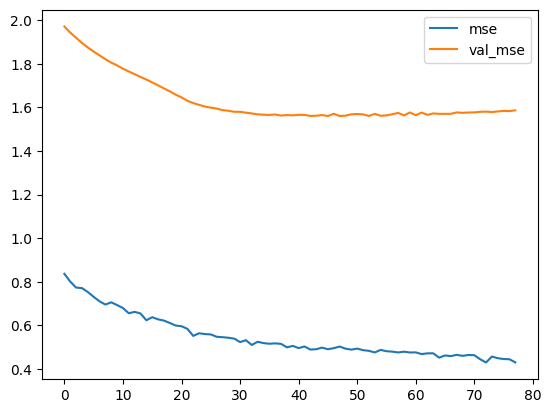

accuracy test: 
13/13 [==============================] - 0s 6ms/step - loss: 0.8594 - mse: 0.8594
Pearsons correlation: 0.407
Pearsons correlation on scaled vals: 0.400


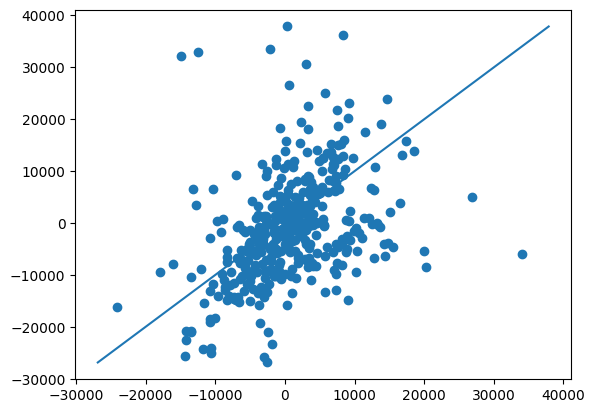

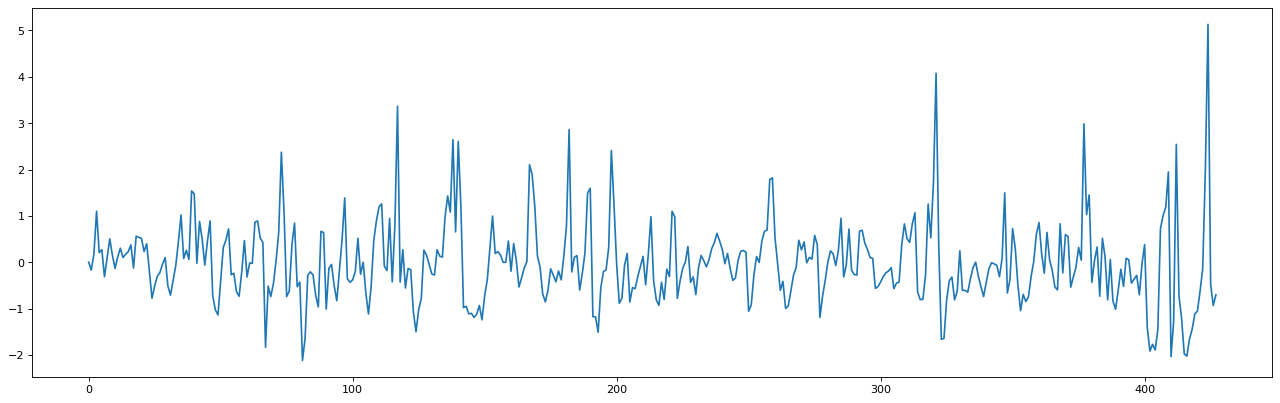

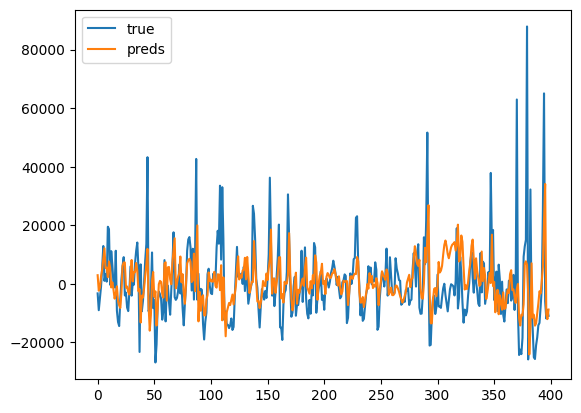

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18241 (71.25 KB)
Trainable params: 18241 (71.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/512
50/50 [==============================] - ETA: 0s - loss: 0.9082 - mse: 0.9082
Epoch 1: val_loss improved from inf to 1.61345, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 4s 56ms/step - loss: 0.9082 - mse: 0.9082 - val_loss: 1.6135 - val_mse: 1.6135 - lr: 1.0000e-04
Epoch 2/512
48/50 [===========================>..] - ETA: 0s - loss: 0.9182 - mse: 0.9182
Epoch 2: val_loss improved from 1.61345 to 1.58620, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.8959 - mse: 0.8959 - val_loss: 1.5862 - val_mse: 1.5862 - lr: 1.0000e-04
Epoch 3/512
44/50 [=========================>....] - ETA: 0s - loss: 0.8537 - mse: 0.8537
Epoch 3: val_loss improved from 1.58620 to 1.56019, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.8577 - mse: 0.8577 - val_loss: 1.5602 - val_mse: 1.5602 - lr: 1.0000e-04
Epoch 4/512
50/50 [==============================] - ETA: 0s - loss: 0.8362 - mse: 0.8362
Epoch 4: val_loss improved from 1.56019 to 1.53674, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.8362 - mse: 0.8362 - val_loss: 1.5367 - val_mse: 1.5367 - lr: 1.0000e-04
Epoch 5/512
43/50 [========================>.....] - ETA: 0s - loss: 0.8486 - mse: 0.8486
Epoch 5: val_loss improved from 1.53674 to 1.51229, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.8420 - mse: 0.8420 - val_loss: 1.5123 - val_mse: 1.5123 - lr: 1.0000e-04
Epoch 6/512
48/50 [===========================>..] - ETA: 0s - loss: 0.8178 - mse: 0.8178
Epoch 6: val_loss improved from 1.51229 to 1.49165, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.8203 - mse: 0.8203 - val_loss: 1.4916 - val_mse: 1.4916 - lr: 1.0000e-04
Epoch 7/512
45/50 [==========================>...] - ETA: 0s - loss: 0.8069 - mse: 0.8069
Epoch 7: val_loss improved from 1.49165 to 1.46796, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.8113 - mse: 0.8113 - val_loss: 1.4680 - val_mse: 1.4680 - lr: 1.0000e-04
Epoch 8/512
50/50 [==============================] - ETA: 0s - loss: 0.7999 - mse: 0.7999
Epoch 8: val_loss improved from 1.46796 to 1.44799, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7999 - mse: 0.7999 - val_loss: 1.4480 - val_mse: 1.4480 - lr: 1.0000e-04
Epoch 9/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7910 - mse: 0.7910
Epoch 9: val_loss improved from 1.44799 to 1.42974, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 50ms/step - loss: 0.7880 - mse: 0.7880 - val_loss: 1.4297 - val_mse: 1.4297 - lr: 1.0000e-04
Epoch 10/512
49/50 [============================>.] - ETA: 0s - loss: 0.7413 - mse: 0.7413
Epoch 10: val_loss improved from 1.42974 to 1.41169, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.7453 - mse: 0.7453 - val_loss: 1.4117 - val_mse: 1.4117 - lr: 1.0000e-04
Epoch 11/512
45/50 [==========================>...] - ETA: 0s - loss: 0.7753 - mse: 0.7753
Epoch 11: val_loss improved from 1.41169 to 1.39631, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 50ms/step - loss: 0.7611 - mse: 0.7611 - val_loss: 1.3963 - val_mse: 1.3963 - lr: 1.0000e-04
Epoch 12/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7554 - mse: 0.7554
Epoch 12: val_loss improved from 1.39631 to 1.37928, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7666 - mse: 0.7666 - val_loss: 1.3793 - val_mse: 1.3793 - lr: 1.0000e-04
Epoch 13/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7359 - mse: 0.7359
Epoch 13: val_loss improved from 1.37928 to 1.36582, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.7513 - mse: 0.7513 - val_loss: 1.3658 - val_mse: 1.3658 - lr: 1.0000e-04
Epoch 14/512
47/50 [===========================>..] - ETA: 0s - loss: 0.7530 - mse: 0.7530
Epoch 14: val_loss improved from 1.36582 to 1.34826, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 49ms/step - loss: 0.7386 - mse: 0.7386 - val_loss: 1.3483 - val_mse: 1.3483 - lr: 1.0000e-04
Epoch 15/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7189 - mse: 0.7189
Epoch 15: val_loss improved from 1.34826 to 1.33482, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7445 - mse: 0.7445 - val_loss: 1.3348 - val_mse: 1.3348 - lr: 1.0000e-04
Epoch 16/512
44/50 [=========================>....] - ETA: 0s - loss: 0.7138 - mse: 0.7138
Epoch 16: val_loss improved from 1.33482 to 1.32546, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 57ms/step - loss: 0.7187 - mse: 0.7187 - val_loss: 1.3255 - val_mse: 1.3255 - lr: 1.0000e-04
Epoch 17/512
48/50 [===========================>..] - ETA: 0s - loss: 0.7193 - mse: 0.7193
Epoch 17: val_loss improved from 1.32546 to 1.30954, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7155 - mse: 0.7155 - val_loss: 1.3095 - val_mse: 1.3095 - lr: 1.0000e-04
Epoch 18/512
50/50 [==============================] - ETA: 0s - loss: 0.7251 - mse: 0.7251
Epoch 18: val_loss improved from 1.30954 to 1.28938, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 2s 50ms/step - loss: 0.7251 - mse: 0.7251 - val_loss: 1.2894 - val_mse: 1.2894 - lr: 1.0000e-04
Epoch 19/512
49/50 [============================>.] - ETA: 0s - loss: 0.7214 - mse: 0.7214
Epoch 19: val_loss improved from 1.28938 to 1.27912, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.7170 - mse: 0.7170 - val_loss: 1.2791 - val_mse: 1.2791 - lr: 1.0000e-04
Epoch 20/512
49/50 [============================>.] - ETA: 0s - loss: 0.6918 - mse: 0.6918
Epoch 20: val_loss improved from 1.27912 to 1.26738, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.6937 - mse: 0.6937 - val_loss: 1.2674 - val_mse: 1.2674 - lr: 1.0000e-04
Epoch 21/512
50/50 [==============================] - ETA: 0s - loss: 0.6970 - mse: 0.6970
Epoch 21: val_loss improved from 1.26738 to 1.25539, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 58ms/step - loss: 0.6970 - mse: 0.6970 - val_loss: 1.2554 - val_mse: 1.2554 - lr: 1.0000e-04
Epoch 22/512
48/50 [===========================>..] - ETA: 0s - loss: 0.6918 - mse: 0.6918
Epoch 22: val_loss improved from 1.25539 to 1.24239, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 52ms/step - loss: 0.6844 - mse: 0.6844 - val_loss: 1.2424 - val_mse: 1.2424 - lr: 1.0000e-04
Epoch 23/512
44/50 [=========================>....] - ETA: 0s - loss: 0.6928 - mse: 0.6928
Epoch 23: val_loss improved from 1.24239 to 1.22361, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.6874 - mse: 0.6874 - val_loss: 1.2236 - val_mse: 1.2236 - lr: 1.0000e-04
Epoch 24/512
49/50 [============================>.] - ETA: 0s - loss: 0.6769 - mse: 0.6769
Epoch 24: val_loss improved from 1.22361 to 1.21486, saving model to saved_model/7ff3ac45.x


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x2b1871e85540>>
Traceback (most recent call last):
  File "/home/home0/borsisti/michdigi/.conda/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 60ms/step - loss: 0.6771 - mse: 0.6771 - val_loss: 1.2149 - val_mse: 1.2149 - lr: 1.0000e-04
Epoch 25/512
49/50 [============================>.] - ETA: 0s - loss: 0.6728 - mse: 0.6728
Epoch 25: val_loss improved from 1.21486 to 1.19771, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 51ms/step - loss: 0.6814 - mse: 0.6814 - val_loss: 1.1977 - val_mse: 1.1977 - lr: 1.0000e-04
Epoch 26/512
49/50 [============================>.] - ETA: 0s - loss: 0.6418 - mse: 0.6418
Epoch 26: val_loss improved from 1.19771 to 1.18848, saving model to saved_model/7ff3ac45.x
INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


INFO:tensorflow:Assets written to: saved_model/7ff3ac45.x/assets


50/50 [==============================] - 3s 53ms/step - loss: 0.6329 - mse: 0.6329 - val_loss: 1.1885 - val_mse: 1.1885 - lr: 1.0000e-04
Epoch 27/512
49/50 [============================>.] - ETA: 0s - loss: 0.6477 - mse: 0.6477
Epoch 27: val_loss improved from 1.18848 to 1.17988, saving model to saved_model/7ff3ac45.x


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x2b1871e85540>>
Traceback (most recent call last):
  File "/home/home0/borsisti/michdigi/.conda/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [4]:

from models_repo.LinearRegressor import LinearRegressor
from models_repo.LSTMRegressor import LSTMRegressor2L, LSTMRegressor

train_filenames, test_filenames = dataset.load_data(shuffle=False)
trainer = ModelTrainer(batch_size=32)
k = 5
kf = KFold(n_splits=k)
print(train_filenames.shape)
epochs = 512
loss = 'mse'
for train_index, val_index in kf.split(train_filenames):
    model_name =generate_model_name()
    train_fold_filenames, val_fold_filenames = train_filenames[train_index], train_filenames[val_index]
    # Split the training data into training and validation sets for this fold
    train_generator, valid_generator,input_shape, output_shape = dataset.generate_data(train_fold_filenames, val_fold_filenames)
    # genero il modello a che prende in considerazione input ed output shape
    regressor = LSTMRegressor(model_name=model_name)
    regressor.generate_model(input_shape, output_shape)

    # alleno il modello
    trainer.run(
        model=regressor.model,
        model_name=regressor.model_name,
        train={"filenames": train_fold_filenames, "generator": train_generator},
        test={'filenames': val_fold_filenames, 'generator': valid_generator},
        optimizer=Adam(learning_rate=0.0001),
        epochs=epochs,
        loss=loss
    )

    print("accuracy test: ")
    _, test_generator, __, ___ = dataset.generate_data(train_filenames, test_filenames)
    lstm_y_preds = regressor.model.predict(test_generator)
    accuracy = regressor.model.evaluate(test_generator)

    scaler_path = 'train-scalers/'
    X_test, y_test = dataset.generator_to_Xy(test_generator)

    # eval_model.eval(model_name)
    lstm_y_preds = regressor.model.predict(test_generator)
    regressor.model.evaluate(test_generator)

    eval_pearsonsr(lstm_y_preds, y_test, scalers_path=scaler_path, remove_outliers=True)

    y_true = y_test.reshape(y_test.shape[0], )
    scaled_y_true = scale_preds(y_true, scaler_path=f'{scaler_path}/Rn_olb_scaler.save')
    scaled_y_preds = scale_preds(lstm_y_preds, scaler_path=f'{scaler_path}/Rn_olb_scaler.save')

    rn = DatasetGenerator.get_ts_from_ds(X_test, -2)
    plt.figure(figsize=(20, 6), dpi=80)
    plt.plot(rn)
    plt.show()

    plt.plot(scaled_y_true, label='true')
    plt.plot(scaled_y_preds, label='preds')
    plt.legend()
    plt.show()

    # ottengo X_train,y_train ed X_test, y_test
    #X_train_fold, y_train_fold = dataset.generator_to_Xy(train_generator)
    #X_val_fold, y_val_fold = dataset.generator_to_Xy(valid_generator)

    #rn = DatasetGenerator.get_ts_from_ds(X_train_fold, y_train_fold, -2)
    #rn_test = DatasetGenerator.get_ts_from_ds(X_val_fold, y_val_fold, -2)
    #plt.figure(figsize=(20,6))
    #plt.plot(rn)
    #plt.figure(figsize=(20,6))
    #plt.plot(rn_test)